# Importations et variables

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import networkx as nx
import scipy
import os
import glob
import matplotlib.image as mpimg
import matplotlib.colors as colors
import matplotlib.cm as cmx
import re

from tqdm import tqdm
from mpl_toolkits import mplot3d
from scipy.stats import pearsonr
from scipy.stats import linregress

%matplotlib qt

In [2]:
import mc.load
import mc.compute
import mc.plot

In [3]:
path_rhesus = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Rhesus/'
path_rhesus_focal = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Rhesus/Focals/new'
path_rhesus_infos = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Rhesus/Individus/infos.xlsx'
        
path_tonk_focal = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Tonk/Focals/'
path_tonk_infos = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Tonk/Individus/infos.xlsx'

In [4]:
fichiers_rhesus = mc.load.list_files(path_rhesus_focal)
infos_rhesus = mc.load.infos(path_rhesus_infos)

fichiers_tonk = mc.load.list_files(path_tonk_focal)
infos_tonk = mc.load.infos(path_tonk_infos)

In [5]:
rhesus = ['Anyanka', 'Arwen', 'Boromir', 'Djocko','Eowyn','Faramir','Kabuki','Linconnue','Natasha','Quinoa','Spliff','Theoden','Ulysse', 'Vega','Vladimir', 'Volga' , 'Yelena', 'Yvan']

tonk = ['Abricot', 'Alaryc', 'Barnabe', 'Berenice', 'Cesar', 'Dory', 'Eric', 'Ficelle', 'Gaia', 'Gandhi', 'Havane', 'Jeanne', 'Lady', 'Lassa', 'Nema', 'Nereis', 'Olga', 'Olli', 'Patchouli', 'Patsy', 'Ulysse', 'Yin', 'Yoh']

individus_scanned = ['Theoden', 'Boromir', 'Faramir']

In [6]:
aggressive_behaviors = ['Deplacement', 'Menace', 'Agress. phys.']

affiliative_behaviors = ['1 Debut Grooming', 'Etreinte', 'Se repose sur', 'Portage', 'Jeu social', 'Contact passif']

proximity_behavior = {'1. Contact passif' : 1, '2. Espace peripersonnel': 1, '3. peri<...<2m' : 0.5}

dis_matrices = {'Constraint' : 'Greens', 'Centrality' : 'Oranges', 'Social distance' : 'Purples', 'Kinship' : 'Blues', 'Dominance' : 'PuRd'}

In [19]:
mc.load.reorder_files(fichiers_rhesus, save=True, name = 'focal.csv', path = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Rhesus/')

,Observation id,Observation date,Description,Media file,Total length,FPS,Subject,Behavior,Behavioral category,Modifiers,Behavior type,Start (s),Stop (s),Duration (s),Comment start,Comment stop
0,0104 pm screen11 inverse,2021-04-01 13:49:45,NaN,LIVE,3890.056,NaN,Eowyn,Immobile,NaN,NaN,STATE,116.467,148.821,32.354,NaN,NaN
1,0104 pm screen11 inverse,2021-04-01 13:49:45,NaN,LIVE,3890.056,NaN,Eowyn,0. Debut du scan,5 Proximite,NaN,POINT,117.463,117.463,NaN,NaN,NaN
2,0104 pm screen11 inverse,2021-04-01 13:49:45,NaN,LIVE,3890.056,NaN,Eowyn,4. Prox. 2-5 m,5 Proximite,Faramir,POINT,117.951,117.951,NaN,NaN,NaN
3,0104 pm screen11 inverse,2021-04-01 13:49:45,NaN,LIVE,3890.056,NaN,Eowyn,Selfgrooming,Cpt autocentré,ventre,STATE,128.312,135.120,6.808,NaN,NaN
4,0104 pm screen11 inverse,2021-04-01 13:49:45,NaN,LIVE,3890.056,NaN,Eowyn,Selfgrooming,Cpt autocentré,minishort ventral,STATE,136.139,143.001,6.862,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,screen7 spliff et l'inconnue,2021-03-16 09:06:51,NaN,LIVE,2099.199,NaN,Spliff,Se deplace,NaN,NaN,STATE,1903.969,1993.774,89.805,NaN,NaN
117,screen7 spliff et l'inconnue,2021-03-16 09:06:51,NaN,LIVE,2099.199,NaN,Spliff,0. Debut du scan,5 Proximite,NaN,POINT,1926.199,1926.199,NaN,NaN,NaN
118,screen7 spliff et l'inconnue,2021-03-16 09:06:51,NaN,LIVE,2099.199,NaN,Spliff,3. peri<...<2m,5 Proximite,"Boromir,Arwen,Theoden,Anyanka",POINT,1929.392,1929.392,NaN,NaN,NaN
119,screen7 spliff et l'inconnue,2021-03-16 09:06:51,NaN,LIVE,2099.199,NaN,Spliff,4. Prox. 2-5 m,5 Proximite,"Quinoa,Ulysse,Yelena,Vladimir,Volga",POINT,1944.208,1944.208,NaN,NaN,NaN


# Fonctions

# Calculs matrices

In [7]:
matrix_ages_rhesus = mc.compute.matrices_infos(rhesus, infos_rhesus, 'age')

matrix_domination_rhesus = mc.compute.matrices_infos(rhesus, infos_rhesus, 'domination')

matrix_gender_rhesus = mc.compute.matrices_infos(rhesus, infos_rhesus, 'gender')

matrix_kinship_rhesus = mc.load.kinship(path_rhesus_infos)

In [8]:
matrix_ages_tonk = mc.compute.matrices_infos(tonk, infos_tonk, 'age')

matrix_domination_tonk = mc.compute.matrices_infos(tonk, infos_tonk, 'domination')

matrix_gender_tonk = mc.compute.matrices_infos(tonk, infos_tonk, 'gender')

matrix_kinship_tonk = mc.load.kinship(path_tonk_infos)

In [22]:
mat = mc.compute.dsi_affiliative(affiliative_behaviors, rhesus, ['C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Rhesus/focal.csv'])
np.save(path_rhesus + 'mat_affiliative', mat)

C:\Users\maell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [23]:
mat,t = mc.compute.thresholed_matrix(mat, 0.001)
np.save(path_rhesus + 'mat_affiliative_thresholded', mat)

In [24]:
mat = mc.compute.binary_matrix(mat)
np.save(path_rhesus + 'mat_affiliative_thresholded_binary', mat)

# Dissimilarity matrix

In [61]:
matrix_domination_t = np.delete(matrix_domination, individus.index('Theoden'),1)
matrix_domination_t = np.delete(matrix_domination_t, individus.index('Theoden'),0)

matrix_domination_f = np.delete(matrix_domination, individus.index('Faramir'),1)
matrix_domination_f = np.delete(matrix_domination_f, individus.index('Faramir'),0)

matrix_domination_b = np.delete(matrix_domination, individus.index('Boromir'),1)
matrix_domination_b = np.delete(matrix_domination_b, individus.index('Boromir'),0)

In [71]:
dissimilarity_matrix_affiliative_t = compute_dis_matrix(matrix_binary_affiliative, individus, 'Theoden', type_dis='Social distance')

dissimilarity_matrix_centrality_t = compute_dis_matrix(matrix_binary_affiliative, individus, 'Theoden', type_dis='Centrality')

dissimilarity_matrix_constraint_t = compute_dis_matrix(matrix_binary_affiliative, individus, 'Theoden', type_dis='Constraint')

dissimilarity_matrix_kinship_t = compute_dis_matrix(matrix_parente, individus, 'Theoden', type_dis='Kinship')

dissimilarity_matrix_age_t = compute_dis_matrix(matrix_ages, individus, 'Theoden', type_dis='Kinship')

dissimilarity_matrix_gender_t = compute_dis_matrix(matrix_gender, individus, 'Theoden', type_dis='Kinship')


dissimilarity_matrix_affiliative_b = compute_dis_matrix(matrix_binary_affiliative, individus, 'Boromir', type_dis='Social distance')

dissimilarity_matrix_centrality_b = compute_dis_matrix(matrix_binary_affiliative, individus, 'Boromir', type_dis='Centrality')

dissimilarity_matrix_constraint_b = compute_dis_matrix(matrix_binary_affiliative, individus, 'Boromir', type_dis='Constraint')

dissimilarity_matrix_kinship_b = compute_dis_matrix(matrix_parente, individus, 'Boromir', type_dis='Kinship')

dissimilarity_matrix_age_b = compute_dis_matrix(matrix_ages, individus, 'Boromir', type_dis='Kinship')

dissimilarity_matrix_gender_b = compute_dis_matrix(matrix_gender, individus, 'Boromir', type_dis='Kinship')


dissimilarity_matrix_affiliative_f = compute_dis_matrix(matrix_binary_affiliative, individus, 'Faramir', type_dis='Social distance')

dissimilarity_matrix_centrality_f = compute_dis_matrix(matrix_binary_affiliative, individus, 'Faramir', type_dis='Centrality')

dissimilarity_matrix_constraint_f = compute_dis_matrix(matrix_binary_affiliative, individus, 'Faramir', type_dis='Constraint')

dissimilarity_matrix_kinship_f = compute_dis_matrix(matrix_parente, individus, 'Faramir', type_dis='Kinship')

dissimilarity_matrix_age_f = compute_dis_matrix(matrix_ages, individus, 'Faramir', type_dis='Kinship')

dissimilarity_matrix_gender_f = compute_dis_matrix(matrix_gender, individus, 'Faramir', type_dis='Kinship')

In [35]:
dissimilarity_matrix_social_distance = compute_dis_matrix_global(matrix_affiliative, individuals=individus, type_dis='Social distance')

dissimilarity_matrix_constraint = compute_dis_matrix_global(matrix_affiliative, individuals=individus, type_dis='Constraint')

dissimilarity_matrix_centrality = compute_dis_matrix_global(matrix_affiliative, individuals=individus, type_dis='Centrality')

# Network Graphs

In [209]:
test = np.array(matrix_parente)
for i in range(len(test)):
    for j in range (len(test)):
        if test[i][j] < 0.5:
            test[i][j] = 0
            
plot_network(matrix_binary_affiliative, individus, node_colors='Purples', network_type='Social distance', ind='Theoden', images=True, save=False, other_matrix = test, path = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Figures/', title = 'network_parente_05_social_affiliative_links') 

In [25]:
matrix_proximity_thresholed,threshold_proximity = thresholed_matrix(matrix_proximity)

matrix_affiliative_thresholed,threshold_affiliative = thresholed_matrix(matrix_affiliative)

network_proximity = plot_network(matrix_proximity_thresholed, individus, color_genders, title = 'Proximity_network')

network_affiliative = plot_network(matrix_affiliative_thresholed, individus, color_genders, title = 'Affiliative_network')

# Classical Heatmaps

In [21]:
heatmap_parente = plot_heatmap(matrix_parente, individus, color='Blues', labels=False, save=True, name_save = 'matrice_parente')

heatmap_ages = plot_heatmap(matrix_ages, individus, color='Reds', labels=False, save=True, name_save = 'matrice_ages')

heatmap_genders = plot_heatmap(matrix_gender, individus, color='YlGnBu', labels=False, save=True, name_save = 'matrice_genders')

heatmap_domination = plot_heatmap(matrix_domination, individus, color='PuRd', labels=False, save=True, name_save = 'matrice_domination')


# Dissimilarity Heatmaps

In [ ]:
heatmap_dissimilarity_affiliative = plot_heatmap(dissimilarity_matrix_affiliative, individus, color = 'Purples', id_scan = ind_scanned)

heatmap_dissimilarity_proximity = plot_heatmap(dissimilarity_matrix_proximity, individus, color = 'Purples', id_scan = ind_scanned)

heatmap_dissimilarity_centrality_a = plot_heatmap(dissimilarity_matrix_centrality_a, individus, color = 'Oranges', id_scan = ind_scanned)

heatmap_dissimilarity_centrality_p = plot_heatmap(dissimilarity_matrix_centrality_p, individus, color = 'Oranges', id_scan = ind_scanned)

heatmap_dissimilarity_constraint_p = plot_heatmap(dissimilarity_matrix_constraint_p, individus, color = 'Greens', id_scan = ind_scanned)

heatmap_dissimilarity_constraint_a = plot_heatmap(dissimilarity_matrix_constraint_a, individus, color = 'Greens', id_scan = ind_scanned)


# Linear regressions

In [19]:
flat_matrix_affiliative = np.matrix.flatten(matrix_affiliative)
flat_matrix_proximity = np.matrix.flatten(matrix_proximity)
flat_matrix_aggressive = np.matrix.flatten(matrix_aggressive)

In [21]:
slope_afp, intercept_afp, r_value_afp, p_value_afp, std_err_afp = linregress(flat_matrix_affiliative, flat_matrix_proximity)
slope_agp, intercept_agp, r_value_agp, p_value_agp, std_err_agp = linregress(flat_matrix_aggressive, flat_matrix_proximity)
slope_afag, intercept_afag, r_value_afag, p_value_afag, std_err_afag = linregress(flat_matrix_affiliative, flat_matrix_aggressive)

In [54]:
fig,ax = plt.subplots(3,1, figsize=(10,10))

ax = plt.subplot(311)
plt.scatter(matrix_affiliative, matrix_proximity)
x = np.arange(np.min(matrix_affiliative), int(np.max(matrix_affiliative))+1)
plt.plot(x, slope_afp*x + intercept_afp, color='g')
plt.xlabel('affiliatif behavior')
plt.ylabel('proximity')
plt.text(15,3,'r²='+str(round(r_value_afp**2,3))+'\n'+'p='+str(p_value_afp))

plt.subplot(312)
plt.scatter(matrix_aggressive, matrix_proximity)
x = np.arange(np.min(matrix_aggressive), int(np.max(matrix_aggressive))+1)
plt.plot(x, slope_agp*x + intercept_agp, color='g')
plt.xlabel('aggressive behavior')
plt.ylabel('proximity')
plt.text(18,2,'r²='+str(round(r_value_agp**2,3))+'\n'+'p='+str(round(p_value_agp,3)))

plt.subplot(313)
plt.scatter(matrix_affiliative, matrix_aggressive)
x = np.arange(np.min(matrix_affiliative), int(np.max(matrix_affiliative))+1)
plt.plot(x, slope_afag*x + intercept_afag, color='g')
plt.xlabel('affiliatif behavior')
plt.ylabel('aggressive behavior')
plt.text(15,3,'r²='+str(round(r_value_afag**2,3))+'\n'+'p='+str(round(p_value_afag,3)))

plt.savefig('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Figures/linear_regressions.png')

# Pearson coeff

In [73]:
flat_dissimilarity_matrix_affiliative_t = np.matrix.flatten(dissimilarity_matrix_affiliative_t)
flat_dissimilarity_matrix_centrality_t = np.matrix.flatten(dissimilarity_matrix_centrality_t)
flat_dissimilarity_matrix_constraint_t = np.matrix.flatten(dissimilarity_matrix_constraint_t)
flat_dissimilarity_matrix_kinship_t = np.matrix.flatten(dissimilarity_matrix_kinship_t)
flat_dissimilarity_matrix_age_t = np.matrix.flatten(dissimilarity_matrix_age_t)
flat_dissimilarity_matrix_gender_t = np.matrix.flatten(dissimilarity_matrix_gender_t)

flat_dissimilarity_matrix_affiliative_b = np.matrix.flatten(dissimilarity_matrix_affiliative_b) 
flat_dissimilarity_matrix_centrality_b = np.matrix.flatten(dissimilarity_matrix_centrality_b)
flat_dissimilarity_matrix_constraint_b = np.matrix.flatten(dissimilarity_matrix_constraint_b)
flat_dissimilarity_matrix_kinship_b = np.matrix.flatten(dissimilarity_matrix_kinship_b)
flat_dissimilarity_matrix_age_b = np.matrix.flatten(dissimilarity_matrix_age_b)
flat_dissimilarity_matrix_gender_b = np.matrix.flatten(dissimilarity_matrix_gender_b)

flat_dissimilarity_matrix_affiliative_f = np.matrix.flatten(dissimilarity_matrix_affiliative_f)
flat_dissimilarity_matrix_centrality_f = np.matrix.flatten(dissimilarity_matrix_centrality_f)
flat_dissimilarity_matrix_constraint_f = np.matrix.flatten(dissimilarity_matrix_constraint_f)
flat_dissimilarity_matrix_kinship_f = np.matrix.flatten(dissimilarity_matrix_kinship_f)
flat_dissimilarity_matrix_age_f = np.matrix.flatten(dissimilarity_matrix_age_f)
flat_dissimilarity_matrix_gender_f = np.matrix.flatten(dissimilarity_matrix_gender_f)

In [36]:
flat_dissimilarity_matrix_affiliative = np.matrix.flatten(dissimilarity_matrix_social_distance)
flat_dissimilarity_matrix_centrality = np.matrix.flatten(dissimilarity_matrix_centrality)
flat_dissimilarity_matrix_constraint = np.matrix.flatten(dissimilarity_matrix_constraint)
flat_dissimilarity_matrix_age = np.matrix.flatten(matrix_ages)
flat_dissimilarity_matrix_gender = np.matrix.flatten(matrix_gender)
flat_dissimilarity_matrix_hierarchy = np.matrix.flatten(matrix_domination)
flat_dissimilarity_matrix_kinship = []
for i in matrix_parente:
    for j in i:
        flat_dissimilarity_matrix_kinship.append(j)

In [37]:
metrics = ['social_distance','centrality', 'constraint', 'kinship', 'age', 'gender', 'hierarchy']

In [61]:
p_values = np.zeros((len(metrics),len(metrics)))
coeffs = np.zeros((len(metrics),len(metrics)), dtype='object')
matrices = [flat_dissimilarity_matrix_affiliative, flat_dissimilarity_matrix_centrality, flat_dissimilarity_matrix_constraint, flat_dissimilarity_matrix_kinship, flat_dissimilarity_matrix_age, flat_dissimilarity_matrix_gender, flat_dissimilarity_matrix_hierarchy]
for i in range(len(matrices)):
    for j in range(len(matrices)):
        c,p = pearsonr(matrices[i],matrices[j])
        coeffs[i,j]=c
        p_values[i,j]=p

In [62]:
p_values_binary = np.zeros((len(metrics),len(metrics)))
masque = np.zeros((len(metrics),len(metrics)),dtype = np.bool)
nb_of_tests = ((len(metrics)**2)- len(metrics))/2 
for i in range(len(matrices)):
    for j in range(len(matrices)):
        if p_values[i,j] > 0.05/nb_of_tests:
            p_values_binary[i,j] = 0.5
        if p_values[i,j] > 0.05:
            p_values_binary[i,j] = 1
        

In [68]:
test = np.tril(p_values_binary)
test2 = np.tril(coeffs)

In [228]:
0.05/nb_of_tests 

0.0033333333333333335

In [69]:
plot_heatmap(test, metrics, color='Greys', an=test2, save=False, name_save = 'p_values_binary_corrected_global')
#plot_heatmap(p_values, metrics, color='Greys', save=False, name_save = 'p_values_global' )
#plot_heatmap(coeffs, metrics, color='Greys', save=False, name_save = 'pearson_coeffs_global')

In [75]:
fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(test,vmin=np.min(test), vmax=np.max(test),xticklabels=metrics, yticklabels=metrics, cmap='Greys', annot=test2, mask=masque, linewidths=0,  square=True, cbar_kws={'shrink': 0.7})
ax.invert_yaxis()
plt.savefig('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Rhesus/Figures/p_values_to_modify.svg', bbox_inches='tight', pad_inches = 0.5)
            

# Bootstrap

In [10]:
nb_it = 1000
true_matrix = compute_dsi(list_of_b=affiliative_behaviors, type_of_b='Affiliative', ind=individus)
random_matrices = []
means= np.zeros(shape=(len(individus), len(individus)))
std = np.zeros(shape=(len(individus), len(individus)))
bottom = np.zeros(shape=(len(individus), len(individus)))
top = np.zeros(shape=(len(individus), len(individus)))
colors = np.zeros((len(individus), len(individus)), dtype=str)
for i in tqdm(range(0,nb_it)):
    
    givers = random.sample(individus,len(individus))
    id_givers=np.arange(len(givers))
    id_receivers=np.copy(id_givers)
    while (np.min(np.abs(id_givers-id_receivers)) == 0):
        random.shuffle(id_receivers)
    receivers = [givers[id_receivers[i]] for i in range(len(givers))]
    
    matrix = compute_dsi(list_of_b=affiliative_behaviors, type_of_b='Affiliative', ind=individus, rece=receivers, giv=givers, rand=True)
    random_matrices.append(matrix)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [57:21<00:00,  3.44s/it]


In [25]:
which_dyad = []
for i in range(0,len(individus)):
    for j in range(0,len(individus)):
        values = []
        for m in range(len(random_matrices)):
            values.append(random_matrices[m][i][j])
        means[i][j] = np.mean(values)
        std[i][j] = np.std(values)
        bottom[i][j] = means[i][j]-std[i][j]
        top[i][j] = means[i][j]+std[i][j]
        if  bottom[i][j] < true_matrix[i][j] < top[i][j]:
            colors[i][j]='k'
        else:
            colors[i][j]='r'
            which_dyad.append((individus[i],individus[j]))

In [12]:
test =[]
for i in range(0,len(individus)):
    for j in range(0,len(individus)):
        test.append(colors[i][j])

In [13]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")
x = np.arange(len(individus))
y = np.arange(len(individus))
X, Y = np.meshgrid(x,y)
ax3d.plot_surface(X,Y, bottom, color='steelblue', alpha = 0.3)
ax3d.plot_surface(X,Y, top, color='steelblue', alpha = 0.3)
ax3d.scatter3D(X,Y,true_matrix, c=test)
ax3d.set_zlim(-0.2,0.5)

(-0.2, 0.5)

# for threshold

In [24]:
mc.plot.heatmap(dis_mat, rhesus, color = 'Purples', save = True, name_save = 'affiliative_heatmap_not_thresholded', path = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Figures/Figures_rhesus/figures/')

In [ ]:
mc.plot.heatmap(mat_t, rhesus, color = 'Purples', save = True, name_save = 'affiliative_heatmap_thresholded', path = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Figures/Figures_rhesus/figures/')

In [13]:
mc.plot.heatmap(mat_b, rhesus, color = 'Purples', save = True, name_save = 'affiliative_heatmap_thresholded_b', path = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Figures/Figures_rhesus/figures/')

In [20]:
mc.plot.network(mat_b, rhesus, 'Purples', 'Centrality', images= True, save = True, title = "thresholded_binary", path = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Figures/Figures_rhesus/figures/')

In [91]:
mc.plot.network(mat_t, rhesus, 'Purples', 'Centrality', images= True, other_matrix = matrix_kinship_rhesus, save = True, title = "affiliative_thresholded_kinship_layout", path = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Figures/Figures_rhesus/figures/')

In [85]:
for i in range(len(matrix_kinship_rhesus)):
    for j in range(len(matrix_kinship_rhesus)):
        if matrix_kinship_rhesus[i][j]<0.5:
            matrix_kinship_rhesus[i][j] = 0

In [61]:
matrix_kinship_rhesus.columns = np.linspace(0,17, 18)

In [65]:
matrix_kinship_rhesus.index = np.linspace(0,17, 18)

# Tests

In [9]:
dis_mat = np.load('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Rhesus/mat_affiliative.npy')

In [10]:
test = mc.compute.dis_matrix_global(dis_mat, rhesus, mc.compute.func_social_distance)

In [12]:
a = np.zeros((2,2))

In [18]:
b = np.delete(a, [1,1], 1)

In [19]:
b

array([[0.],
       [0.]])

In [11]:
mat = np.zeros(shape=(len(rhesus), len(rhesus))) #initialisation of the dissimilarity matrix
g = nx.Graph(dis_mat)
all_values = mc.compute.func_centrality(g)
for i in range(len(mat)):
    for j in range(len(mat)):
        mat[i,j] = abs(all_values[i]-all_values[j])

In [7]:
function = mc.compute.func_social_distance

In [8]:
function

<function mc.compute.<lambda>(x)>

In [45]:
centrality = lambda x : nx.eigenvector_centrality(x)

In [31]:
def test(variable, func):
    print(func(variable))

In [32]:
test(nx.Graph(dis_mat), centrality)

{0: 0.17318481982748382, 1: 0.3103367520219675, 2: 0.12391918336622716, 3: 0.20100447026048338, 4: 0.4410277563504679, 5: 0.18543949759739278, 6: 0.12391918336622719, 7: 0.27099845042403264, 8: 0.05641292356987046, 9: 0.37271898235489764, 10: 0.3562970762543813, 11: 0.2043340132912915, 12: 0.10290010495156894, 13: 0.05641292356987046, 14: 0.24777275603809273, 15: 0.05119608428559101, 16: 0.3103367520219675, 17: 0.12391918336622719}


In [77]:
dissimilarity_matrix_affiliative_t = compute_dis_matrix_individual(matrix_affiliative, individus, 'Theoden', type_dis='Social distance')

In [78]:
sns.clustermap(dissimilarity_matrix_affiliative_t)

C:\Users\maell\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


In [150]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.cluster.hierarchy import fcluster, ward
from scipy.spatial.distance import pdist, squareform

In [155]:
condensed_matrix = pdist(matrix_binary_affiliative)

In [158]:
a = ward(condensed_matrix)

In [161]:
dissimilarity_matrix = compute_dis_matrix(matrix_binary_affiliative, individuals=individus, id_scan='Theoden', type_dis='Social distance')

In [165]:
d = fcluster(a, t=0.0005, criterion='distance')

In [166]:
d = d- 1

In [167]:
d

array([ 9,  4,  2, 13,  0, 10, 16,  3, 15, 12, 14,  6,  7,  1,  8, 11,  5,
       17], dtype=int32)

In [66]:
test = csr_matrix(bla)

In [67]:
t = reverse_cuthill_mckee(test)

In [169]:
mat = dissimilarity_matrix[d][d]

IndexError: index 17 is out of bounds for axis 0 with size 17

In [154]:
plot_heatmap(mat, individuals=individus, color='Purples', labels=False)

In [59]:
plot_heatmap(dissimilarity_matrix, individuals=individus, color='Purples', labels=False)

In [9]:
neural_matrix_b = dissimilarity_matrix_kinship_b + dissimilarity_matrix_centrality_b + dissimilarity_matrix_constraint_b + dissimilarity_matrix_affiliative_b + matrix_domination_b

neural_matrix_t = dissimilarity_matrix_kinship_t + dissimilarity_matrix_centrality_t + dissimilarity_matrix_constraint_t + dissimilarity_matrix_affiliative_t + matrix_domination_t

neural_matrix_f = dissimilarity_matrix_kinship_f + dissimilarity_matrix_centrality_f + dissimilarity_matrix_constraint_f + dissimilarity_matrix_affiliative_f + matrix_domination_f

NameError: name 'dissimilarity_matrix_kinship_b' is not defined

In [78]:
import collections
g = nx.Graph(matrix_affiliative)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.xlabel('number of connexions')
plt.ylabel('number of individuals')
plt.savefig('repartition_degree')

# Trash 

In [71]:
data = pd.read_csv(fichiers[0], sep=';', encoding="latin-1")
data_tmp = pd.DataFrame(columns=data.columns)
for i in np.unique(data['Observation date']):
    data_day = data[data['Observation date']==i]
    for j in np.unique(data_day['Subject']):
        data_day_subject = data_day[data_day['Subject']==j]
        order = np.argsort(data_day_subject.Start)
        data_tmp = pd.concat([data_tmp,data_day_subject.iloc[order]])

In [5]:
def compute_dis_matrix_global(matrix, individuals, type_dis):
    """ 
    MC 23/03/21
    Inputs
        matrix : matrix from which to compute dissimilarity
        individuals : list of all the individuals in the colony
        type_dis : 'Social distance', 'Centrality', 'Constraint', 
    Outputs
        dissimilarity matrix (numpy array)
    """
    dis_matrix = np.zeros(shape=(len(individuals), len(individuals)))
    g = nx.Graph(matrix)
    if type_dis == 'Social distance':
        all_values = dict(nx.all_pairs_shortest_path_length(g))
    if type_dis == 'Centrality':
        all_values = nx.eigenvector_centrality(g)
    if type_dis == 'Constraint':
        all_values = nx.constraint(g)
            
    for i in range(len(dis_matrix)):
        for j in range(len(dis_matrix)):
            if type_dis == 'Social distance':
                dis_matrix[i,j] = all_values[i][j]
            else:
                dis_matrix[i,j] = abs(all_values[i]-all_values[j])
    return dis_matrix

In [ ]:
def compute_dsi(list_of_b, type_of_b, ind, rand=False,giv=None, rece=None, fichiers=fichiers):
    """
    MC 07/04/21
    Inputs :
        list_of_b : list of behaviors on which to compute the DSI
        type_of_b : type of behaviors, can be : 'Affiliative', 'Aggressive', 'Proximity'
        ind : individus from which to compute the DSI
        rand : True if we want to calculate random matrices for bootstrap, by default = False
        giv : givers individus from which to compute the DSI
        rece : receivers individus from which to compute the DSI
        fichiers : where the data are stored (by default = fichiers)
        
    Outputs:
        matrix of DSI for each dyad
    """
    if type_of_b == 'Proximity':
        return ('Not implemented yet')
    if rand == False:
        giv = ind
        rece = ind
    means_b = np.zeros(shape=(1,len(list_of_b)))
    matrices_b = { str(i) : np.zeros(shape=(len(ind), len(ind))) for i in list_of_b}
    matrix = np.zeros(shape=(len(ind), len(ind)))
    for b in list_of_b:
        total = 0 
        for fichier in fichiers :
            data=pd.read_csv(fichier, sep=';', encoding="latin-1")
            
            for rang in range(len(data)):
                givers = []
                receivers = []
                
                
                if data.Behavior[rang] == b :
                    
                    if type_of_b == 'Aggressive':
                        if 'Focal est recepteur' in str(data.Modifiers[rang]):
                            for i in ind:
                                if i in str(data.Modifiers[rang]):
                                    givers.append(i)
                            receivers.append(data.Subject[rang])
                        if 'Focal est emetteur' in str(data.Modifiers[rang]):
                            givers.append(data.Subject[rang])
                            for i in ind:
                                if i in str(data.Modifiers[rang]):
                                    receivers.append(i)
                                    
                    if type_of_b == 'Affiliative':
                        for i in ind:
                            if i in str(data.Modifiers[rang]):
                                givers.append(i)
                        receivers.append(data.Subject[rang])
                    
                    
                for i in givers:
                    for j in receivers:  
                        matrices_b[b][giv.index(i),rece.index(j)]+=1
                        if type_of_b == 'Affiliative':
                            matrices_b[b][giv.index(j),rece.index(i)]+=1
                        total += 1 
                
        means_b[0][list_of_b.index(b)] = np.mean(matrices_b[b])
        matrices_b[b] = (matrices_b[b]/total)/means_b[0][list_of_b.index(b)]
        matrix += matrices_b[b]
        
    matrix = matrix/len(list_of_b)
    return matrix

In [12]:
path = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Individus/'
files = [f for f in glob.glob(path + "*.png")]

img = []
for f in files:
    img.append(mpimg.imread(f))

dict_names = { i : individus[i] for i in range(0, len(individus) ) }
fig, ax = plt.subplots(figsize=(20,20))
g = nx.Graph(matrix_binary_affiliative)
constraint = nx.constraint(g)
centrality = nx.eigenvector_centrality(g)
distance = nx.single_source_shortest_path_length(g, individus.index('Theoden'))
pos=nx.kamada_kawai_layout(g)
nx.draw_networkx_edges(g,pos)
plt.axis('off')
plt.xlim([-1,1])
plt.ylim([-1,1])

ax=plt.gca()
fig=plt.gcf()
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform
imsize = 0.07
cNorm  = colors.Normalize(vmin=min(constraint), vmax=max(constraint))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='Greens')
for n in g.nodes():
    (x,y) = pos[n]
    xx,yy = trans((x,y))
    xa,ya = trans2((xx,yy))
    b = plt.axes([xa-(imsize+0.02)/2.0,ya-(imsize+0.02)/2.0, imsize+0.02, imsize+0.02 ])
    z= np.zeros((img[n].shape[0]+50, img[n].shape[1]+50,3))
    colorVal = scalarMap.to_rgba(constraint[n])
    z[:,:,0] = colorVal[0]
    z[:,:,1] = colorVal[1]
    z[:,:,2] = colorVal[2]
    b.imshow(z)
    b.axis('off')
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.imshow(img[n])
    a.set_aspect('equal')
    a.axis('off')
    plt.savefig('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Figures/network_2.png')

In [6]:
def compute_dis_matrix_individual(matrix, individuals, id_scan, type_dis):
    """ 
    MC 23/03/21
    Inputs
        matrix : matrix from which to compute dissimilarity
        individuals : list of all the individuals in the colony
        id_scan : name of the individual scanned
        type_dis : 'Social distance', 'Centrality', 'Constraint', 'Kinship'
    Outputs
        dissimilarity matrix (numpy array)
    """
    dis_matrix = np.zeros(shape=(len(individuals), len(individuals)))
    if type_dis == 'Kinship':
        values = matrix[individuals.index(id_scan)]
    else :
        g = nx.Graph(matrix)
        if type_dis == 'Social distance':
            values = nx.shortest_path_length(g, individuals.index(id_scan))
        if type_dis == 'Centrality':
            all_values = nx.eigenvector_centrality(g)
            value = all_values[individuals.index(id_scan)]
        if type_dis == 'Constraint':
            all_values = nx.constraint(g)
            value = all_values[individuals.index(id_scan)]
            
    for i in range(len(dis_matrix)):
        for j in range(len(dis_matrix)):
            if type_dis == 'Social distance' or type_dis == 'Kinship':
                dis_matrix[i,j] = abs(values[i]-values[j])
            else:
                dis_matrix[i,j] = abs((all_values[i]-value)-(all_values[j]-value))
    dis_matrix = np.delete(dis_matrix, individuals.index(id_scan), 1)
    dis_matrix = np.delete(dis_matrix, individuals.index(id_scan), 0)
    return dis_matrix

In [55]:
a = np.zeros(shape=(len(individus), len(individus)))
for i in individus:
    for j in individus:
        a[individus.index(i),individus.index(j)]=t[individus.index(i)][individus.index(j)]
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(a,xticklabels= False, yticklabels=False, cmap='Purples', linewidths=0.1, linecolor='black',  square=True, cbar_kws={'orientation': 'horizontal','shrink': 0.7})
ax.invert_yaxis()
plt.savefig('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Figures/social_distance.png', bbox_inches='tight', pad_inches = 0.5)


In [39]:
color_plot = np.empty(shape=(len(individus), len(individus)),dtype=str)
for i,name in enumerate(individus):
    for j,n in enumerate(individus):
        if genders[i]==genders[j]:
            color_plot[i,j] = 'b'
        else :
            color_plot[i,j] = 'g'

In [31]:
matrix_parente_rhesus = [[0,0.25,0.25,0.25,0.25,0.25,0,0.5,0.25,0,0.5,0.25,0.5,0,0.25,0,0.25,0.25],
                  [0.25,0,0.25,0.25,0.25,0.25,0,0,0.25,0.5,0.25,0.25,0.5,0,0,0,0.5,0.25],
                  [0.25,0.25,0,0.5,0.25,0.25,0.5,0,0.25,0,0.25,0.25,0.5,0.125,0.25,0,0.25,0.5],
                  [0.25,0.25,0.5,0,0.25,0.25,0.5,0,0.25,0,0.25,0.25,0.5,0.125,0.25,0,0.25,0.5],
                  [0.25,0.25,0.25,0.25,0,0.25,0,0,0.25,0,0.25,0.25,0.5,0,0.25,0,0.25,0.25],
                  [0.25,0.25,0.25,0.25,0.25,0,0,0,0.25,0,0.25,0.25,0.5,0.125,0.5,0.5,0.25,0.25],
                  [0,0,0.5,0.5,0,0,0,0,0.125,0,0,0.125,0,0.25,0,0,0,0.5],
                  [0.5,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0],
                  [0.25,0.25,0.25,0.25,0.25,0.25,0.125,0,0,0,0.25,0.5,0.5,0.5,0.25,0.125,0.25,0.25],
                  [0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0],
                  [0.5,0.25,0.25,0.25,0.25,0.25,0,0.5,0.25,0,0,0.25,0.5,0,0.25,0,0.25,0.25],
                  [0.25,0.25,0.25,0.25,0.25,0.25,0.125,0,0.5,0,0.25,0,0.5,0.5,0.25,0.125,0.25,0.25],
                  [0.5,0.5,0.5,0.5,0.5,0.5,0,0,0.5,0,0.5,0.5,0,0,0.5,0,0.5,0.5], 
                  [0,0,0.125,0.125,0,0.125,0.25,0,0.5,0,0,0.5,0,0,0.125,0.25,0,0.125],
                  [0.25,0.25,0.25,0.25,0.25,0.5,0,0,0.25,0,0.25,0.25,0.5,0.125,0,0.5,0.25,0.25],
                  [0,0,0,0,0,0.5,0,0,0.125,0,0,0.125,0,0.25,0.5,0,0,0],
                  [0.25,0.5,0.25,0.25,0.25,0.25,0,0,0.25,0.5,0.25,0.25,0.5,0,0.25,0,0,0.25],
                  [0.25,0.25,0.5,0.5,0.25,0.25,0.5,0,0.25,0,0.25,0.25,0.5,0.125,0.25,0,0.25,0]]

In [34]:
individuals = np.delete(individus, individus.index('Faramir'))
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(dissimilarity_matrix_constraint_f, xticklabels= individuals, yticklabels=individuals, cmap='Greens', square=True, cbar_kws={'orientation': 'horizontal','shrink': 0.7})
ax.invert_yaxis()
plt.savefig('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Figures/matrix_dissimilarity_constraint_Faramir.png', bbox_inches='tight', pad_inches = 0.5) 

In [4]:
shape_genders = []
color_genders = []
for i in genders :
    if i == 1:
        shape_genders.append('s')
        color_genders.append('y')
    else:
        shape_genders.append('o')
        color_genders.append('g')

In [35]:
matrix_affiliative = np.zeros(shape=(len(individus), len(individus)))
for fichier in fichiers :
    data=pd.read_csv(fichier, sep=';', encoding="latin-1")
    for rang in range(len(data)):
        givers = []
        receivers = []
        if data.Behavior[rang] in affiliative_behavior or data.Behavior[rang] == '1 Debut Grooming' :
            for i in individus:
                if i in str(data.Modifiers[rang]):
                    givers.append(i)
            receivers.append(data.Subject[rang])
        for i in givers:
            for j in receivers:  
                matrix_affiliative[individus.index(i)][individus.index(j)]+=1
                matrix_affiliative[individus.index(j)][individus.index(i)]+=1
                
matrix_affiliative = abs(scipy.stats.zscore(matrix_affiliative, axis=None))

In [28]:
def compute_matrix_proximity(list_of_b, ind, rand=False,giv=None, rece=None, fichiers=fichiers):
    """
    MC 23/04/21 
    Inputs :
        list_of_b : list of the weight of each proximity
        ind : individus from which to compute the DSI
        rand : True if we want to calculate random matrices for bootstrap, by default = False
        giv : givers individus from which to compute the DSI
        rece : receivers individus from which to compute the DSI
        fichiers : where the data are stored (by default = fichiers)
        
    Outputs:
        matrix of proximity for each dyad
    """
    if rand == False:
        giv = ind
        rece = ind
    matrix = np.zeros(shape=(len(ind), len(ind)))
    total = 0
    for fichier in fichiers :
        data=pd.read_csv(fichier, sep=';', encoding="latin-1")
        for rang in range(len(data)):
            focal = data.Subject[rang]
            if data.Behavior[rang] in list_of_b:
                for i in ind:
                    if i in str(data.Modifiers[rang]):
                        matrix[ind.index(i)][ind.index(focal)]+=list_of_b[data.Behavior[rang]]
                        matrix[ind.index(focal)][ind.index(i)]+=list_of_b[data.Behavior[rang]]
                        total += 1

    matrix = matrix/total
    mean = np.mean(matrix)
    matrix = matrix/mean
    return matrix

In [102]:
dissimilarity_matrix_affiliative = np.zeros(shape=(len(individus), len(individus)))
values = matrix_affiliative[individus.index(ind_scanned)]
for i in range(len(dissimilarity_matrix_affiliative)):
    for j in range(len(dissimilarity_matrix_affiliative)):
        dissimilarity_matrix_affiliative[i,j] = abs(values[i]-values[j])
dissimilarity_matrix_affiliative = np.delete(dissimilarity_matrix_affiliative, individus.index(ind_scanned), 1)
dissimilarity_matrix_affiliative = np.delete(dissimilarity_matrix_affiliative, individus.index(ind_scanned), 0)

In [7]:
def plot_heatmap(matrix, individuals, color, id_scan=None, save = False, name_save = None, labels=True, an=False):
    """ 
    MC 24/03/21
    Inputs 
        matrix : matrix to be plotted
        individuals : list of all the individuals of the colony
        color : color of the map
        id_scan : name of the individual scanned if dissimilarity matrix, by default = None
        save : True if you want to save the picture, by default = False
        name_save : the name of the figure saved (be careful to give a name if you write save = True !)
        labels : if you want the name of the individuals to be plotted, by default = True
    Outputs
        plot of the heatmap
        plot saved if save = True 
    """
    
    fig, ax = plt.subplots(figsize=(7,7))
    if id_scan != None:
        individuals = np.delete(individuals, individuals.index(id_scan))
    if labels==True:
        labels = individuals
    sns.heatmap(matrix,vmin=np.min(matrix), vmax=np.max(matrix),xticklabels=labels, yticklabels=labels, cmap=color, annot=an, linewidths=0.1, linecolor='black',  square=True, cbar_kws={'orientation': 'horizontal','shrink': 0.7})
    ax.invert_yaxis()
    if save == True:
        plt.savefig('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Rhesus/Figures/'+ name_save + '.png', bbox_inches='tight', pad_inches = 0.5)
            

In [12]:
def compute_dsi_aggressive(list_of_b, ind, rand=False,giv=None, rece=None, fichiers=fichiers):
    """
    MC 07/04/21
    Inputs :
        list_of_b : list of behaviors on which to compute the DSI
        ind : individus from which to compute the DSI
        rand : True if we want to calculate random matrices for bootstrap, by default = False
        giv : givers individus from which to compute the DSI
        rece : receivers individus from which to compute the DSI
        fichiers : where the data are stored (by default = fichiers)
        
    Outputs:
        matrix of DSI for each dyad
    """
    if rand == False:
        giv = ind
        rece = ind
    means_b = np.zeros(shape=(1,len(list_of_b)))
    matrices_b = { str(i) : np.zeros(shape=(len(ind), len(ind))) for i in list_of_b}
    matrix = np.zeros(shape=(len(ind), len(ind)))
    total = { str(i) : 0 for i in list_of_b}
    for fichier in fichiers :
        data=pd.read_csv(fichier, sep=';', encoding="latin-1")
        for rang in range(len(data)):
            givers = []
            receivers = []
            if data.Behavior[rang] in list_of_b :
                if 'Focal est recepteur' in str(data.Modifiers[rang]):
                    for i in ind:
                        if i in str(data.Modifiers[rang]):
                            givers.append(i)
                    receivers.append(data.Subject[rang])
                if 'Focal est emetteur' in str(data.Modifiers[rang]):
                    givers.append(data.Subject[rang])
                    for i in ind:
                        if i in str(data.Modifiers[rang]):
                            receivers.append(i)
            for i in givers:
                for j in receivers:  
                    matrices_b[data.Behavior[rang]][giv.index(i),rece.index(j)]+=1
                    total[data.Behavior[rang]] += 1 
    for b in list_of_b:
        matrices_b[b] = (matrices_b[b]/total[b])        
        means_b[0][list_of_b.index(b)] = np.mean(matrices_b[b])
        matrices_b[b] = matrices_b[b]/(means_b[0][list_of_b.index(b)])
        matrix += matrices_b[b]
        
    matrix = matrix/len(list_of_b)
    return matrix

NameError: name 'fichiers' is not defined

In [12]:
def compute_dsi(list_of_b, type_of_b, ind, fichiers=fichiers):
    """
    MC 07/04/21
    Inputs :
        list_of_b : list of behaviors on which to compute the DSI
        type_of_b : type of behaviors, can be : 'Affiliative', 'Aggressive', 'Proximity', 'Time'
        ind : individus from which to compute the DSI
        fichiers : where the data are stored (by default = fichiers)
        
    Outputs:
        matrix of DSI for each dyad
    """
    if type_of_b == 'Time' or type_of_b == 'Proximity':
        return ('Not implemented yet')
    
    means_b = np.zeros(shape=(1,len(list_of_b)))
    matrices_b = { str(i) : np.zeros(shape=(len(ind), len(ind))) for i in list_of_b}
    matrix = np.zeros(shape=(len(ind), len(ind)))
    for b in list_of_b:
        total = 0 
        for fichier in fichiers :
            data=pd.read_csv(fichier, sep=';', encoding="latin-1")
            
            for rang in range(len(data)):
                givers = []
                receivers = []
                if data.Behavior[rang] == b :
                    
                    if type_of_b == 'Aggressive':
                        if 'Focal est recepteur' in str(data.Modifiers[rang]):
                            for i in ind:
                                if i in str(data.Modifiers[rang]):
                                    givers.append(i)
                            receivers.append(data.Subject[rang])
                        if 'Focal est emetteur' in str(data.Modifiers[rang]):
                            givers.append(data.Subject[rang])
                            for i in ind:
                                if i in str(data.Modifiers[rang]):
                                    receivers.append(i)
                                    
                    if type_of_b == 'Affiliative':
                        for i in ind:
                            if i in str(data.Modifiers[rang]):
                                givers.append(i)
                        receivers.append(data.Subject[rang])
                    
                for i in givers:
                    for j in receivers:  
                        matrices_b[b][ind.index(i),ind.index(j)]+=1
                        if type_of_b == 'Affiliative':
                            matrices_b[b][ind.index(j),ind.index(i)]+=1
                        total += 1 
                
        means_b[0][list_of_b.index(b)] = np.mean(matrices_b[b])
        matrices_b[b] = (matrices_b[b]/total)/means_b[0][list_of_b.index(b)]
        matrix += matrices_b[b]
        
    matrix = matrix/len(list_of_b)
    return matrix

In [44]:
def compute_dsi_affiliative(list_of_b, ind, fichiers):
    """
    MC 07/04/21 
    Inputs :
        list_of_b : list of behaviors on which to compute the DSI
        ind : individus from which to compute the DSI
        fichiers : where the data are stored
        
    Outputs:
        matrix of DSI for each dyad
    """
    means_b = {str(i) : 0 for i in list_of_b}
    matrices_b = { str(i) : np.zeros(shape=(len(ind), len(ind))) for i in list_of_b}
    matrices_nb_oc = { str(i) : np.zeros(shape=(len(ind), len(ind))) for i in list_of_b}
    matrix = np.zeros(shape=(len(ind), len(ind)))
    total = { str(i) : 0 for i in list_of_b}
    nb_events = { str(i) : 0 for i in list_of_b}
    for fichier in fichiers :
        data=pd.read_excel(fichier)
        for rang in range(len(data)):
            focal = data.Subject[rang] #Pour chaque ligne, regarde l'individu pris en focal
            if data.Behavior[rang] == '1 Debut Grooming' and data.Modifiers[rang]!='None': #si le behavior est du début de grooming
                start = data['Start (s)'][rang] #Stocker le temps de départ de ce grooming
                end=0
                for i in range(rang, len(data)):
                    if data.Behavior[i]=='2 Zone de Grooming':
                        groomed = re.findall(r'\d+', data.Modifiers[i])
                        rang2 = i
                        break
                for j in range (rang2, len(data)):
                    if data.Behavior[j] == '4 Fin Grooming':
                        who = re.findall(r'\d+', data.Modifiers[j])
                        if who == groomed:
                            end = data['Stop (s)'][j]
                            break
                if end !=0:
                    duration = end - start
                else:
                    duration = 0 

                for i in ind:
                    if i in str(data.Modifiers[rang]):
                        matrices_b['1 Debut Grooming'][ind.index(i),ind.index(focal)]+=duration
                        matrices_nb_oc['1 Debut Grooming'][ind.index(i),ind.index(focal)]+= 1
                        matrices_b['1 Debut Grooming'][ind.index(focal),ind.index(i)]+=duration
                        matrices_nb_oc['1 Debut Grooming'][ind.index(focal),ind.index(i)]+= 1
                        total['1 Debut Grooming'] += duration
                        nb_events['1 Debut Grooming'] += 1


            elif data.Behavior[rang] in list_of_b and data.Behavior[rang] != '1 Debut Grooming':
                for i in ind:
                    if i in str(data.Modifiers[rang]):
                        matrices_b[data.Behavior[rang]][ind.index(i),ind.index(focal)]+=data['Duration (s)'][rang]
                        matrices_nb_oc[data.Behavior[rang]][ind.index(i),ind.index(focal)]+= 1
                        matrices_b[data.Behavior[rang]][ind.index(focal),ind.index(i)]+=data['Duration (s)'][rang]
                        matrices_nb_oc[data.Behavior[rang]][ind.index(focal),ind.index(i)]+= 1
                        total[data.Behavior[rang]] += data['Duration (s)'][rang]
                        nb_events[data.Behavior[rang]] += 1
                        
    for b in list_of_b:
        matrices_b[b][matrices_b[b] != 0]=matrices_b[b][matrices_b[b] != 0]/matrices_nb_oc[b][matrices_nb_oc[b] != 0]
        nb_dyades = np.count_nonzero(matrices_b[b])/2
        means_b[b] = total[b]/nb_events[b]
        matrices_b[b] = matrices_b[b]/(means_b[b])
        matrix += matrices_b[b]
        
    matrix = matrix/len(list_of_b)
    return matrix

In [9]:
def thresholed_matrix(matrix,step):
    """
    MC 24/03/21
    Inputs:
        matrix : matrix to threshold
        step : the step by which to increase the threshold
    Outputs:
        matrix thresholed, threshold
    """
    m_t = matrix
    g = nx.Graph(m_t)
    degree = g.degree()
    m = np.mean([v for k, v in degree])
    threshold = 0
    while m > 3:
        threshold += step
        for i in range(len(m_t)):
            for j in range(len(m_t)):
                if m_t[i][j] < threshold :
                    m_t[i][j] = 0
                    g = nx.Graph(m_t)
                    degree = g.degree()
                    m = np.mean([v for k, v in degree])
                    
    return m_t, threshold
    

In [8]:
def plot_network(matrix, individuals, node_colors, network_type, other_matrix=None, title='Social_Network', ind=False, images=False, save = False, path=None):
    """
    MC 24/03/21
    Inputs :
        matrix : the matrix on which the network is based
        individuals : list of all the individuals of the colony 
        node_colors : list of the colors of all the nodes 
        network_type : 'Constraint', 'Centrality', 'Social distance'
        other_matrix : if we want a layout based on another matrix than the affiliative matrix, by default = False
        title : title of the network (NO SPACE PLS), by default = 'Social_Network'
        ind : the individual on which to calculate the social distance, by default = False
        images : if you want the pictures of the individuals plotted on the graph, by default = False
        save : True if you want to save the figure, by default = False
        path : path to the directory where to save the figure, by default = None 
        (if None, save in the same directory as the code)
    Outputs :
        plot of the network
        plot saved if save = True
    """
    if images:
        path_images = 'C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Tonk/Individus/'
        files = [f for f in glob.glob(path_images + "*.png")]
        img = []
        for f in files:
            img.append(mpimg.imread(f))
    if other_matrix == None:
        other_matrix=matrix
    dict_names = { i : individuals[i] for i in range(0, len(individuals))}
    fig, ax = plt.subplots(figsize=(20,20))
    g = nx.Graph(other_matrix)
    h = nx.Graph(matrix)
    if network_type == 'Constraint':
        value = nx.constraint(h)
        color = 'Greens'
    if network_type == 'Centrality':
        value = nx.eigenvector_centrality(h)
        color = 'Oranges'
    if network_type == 'Social distance':  
        value = nx.single_source_shortest_path_length(h, individuals.index(ind))
        m = max(value.values())
        for i in value.values():
            i = m - i
        color = 'Purples'
    widths = g.edges()
    weights = [(g[u][v]['weight'])*0.5 for u,v in widths]
    pos=nx.kamada_kawai_layout(g)
    cNorm  = colors.Normalize(vmin=min(value.values()), vmax=max(value.values()))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=color)
    
    nx.draw_networkx_edges(h,pos, width=weights)
    if images:
        plt.axis('off')
        plt.xlim([-1,1])
        plt.ylim([-1,1])
        ax=plt.gca()
        fig=plt.gcf()
        trans = ax.transData.transform
        trans2 = fig.transFigure.inverted().transform
        imsize = 0.05
        for n in g.nodes():
            (x,y) = pos[n]
            xx,yy = trans((x,y))
            xa,ya = trans2((xx,yy))
            b = plt.axes([xa-(imsize+0.02)/2.0,ya-(imsize+0.02)/2.0, imsize+0.02, imsize+0.02 ])
            z= np.zeros((img[n].shape[0]+50, img[n].shape[1]+50,3))
            colorVal = scalarMap.to_rgba(value[n])
            z[:,:,0] = colorVal[0]
            z[:,:,1] = colorVal[1]
            z[:,:,2] = colorVal[2]
            b.imshow(z)
            b.axis('off')
            a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
            a.imshow(img[n])
            a.set_aspect('equal')
            a.axis('off')
    else:
        nx.draw_networkx_nodes(g, pos, node_color=node_colors)
        label_options = {"fc": "white", "alpha": 0.8}
        nx.draw_networkx_labels(g, pos, labels=dict_names, bbox=label_options)
        
    ax.margins(0.1, 0.1)
    ax.set_title(title)
    if save == True:
        if path == None:
            path = os.getcwd()
        plt.savefig(path + title + '.png')

In [11]:
def reorder_files(fichiers, save = False, name=None):
    """
    MC/BK 29/04/21
    Inputs:
        fichiers : list of the paths to the files to reorder
        save : if you want to save the reorder into a new .csv, by default = False
        name : name of the new .csv, by default = None 
    Outputs:
        DataFrame of the files reordered, and a new .csv if save=True 
    """
    data = pd.read_excel(fichiers[0], encoding="latin-1")
    data_complete = pd.DataFrame(columns=data.columns)
    for fichier in fichiers:
        data = pd.read_excel(fichier, encoding="latin-1")
        data_tmp = pd.DataFrame(columns=data.columns)
        for i in np.unique(data['Observation date']):
            data_day = data[data['Observation date']==i]
            for j in np.unique(data_day['Subject']):
                data_day_subject = data_day[data_day['Subject']==j]
                order = np.argsort(data_day_subject['Start (s)'])
                data_tmp = pd.concat([data_tmp,data_day_subject.iloc[order]])
        data_complete = pd.concat([data_complete, data_tmp])
    if save:
        data_complete.to_csv('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/Tonk/Focals/'+ name, sep=';', encoding="latin-1" )
    return data_complete

In [107]:
g = nx.Graph(matrix_affiliative)
centrality_a = nx.degree_centrality(g)
value_ind_scanned = centrality_a[individus.index(ind_scanned)]
dissimilarity_matrix_centrality_a = np.zeros(shape=(len(individus), len(individus))) 
for i in range(len(dissimilarity_matrix_centrality_a)):
    for j in range(len(dissimilarity_matrix_centrality_a)):
        dissimilarity_matrix_centrality_a[i,j] = abs((centrality_a[i]-value_ind_scanned)-(centrality_a[j]-value_ind_scanned))
dissimilarity_matrix_centrality_a = np.delete(dissimilarity_matrix_centrality_a, individus.index(ind_scanned), 1)
dissimilarity_matrix_centrality_a = np.delete(dissimilarity_matrix_centrality_a, individus.index(ind_scanned), 0)

In [43]:
def compute_matrix_grooming(ind, fichiers, giv=None, rece=None):
    """
    MC 02/06/21 
    Inputs :
        ind : individus from which to compute the DSI
        rand : True if we want to calculate random matrices for bootstrap, by default = False
        giv : givers individus from which to compute the DSI
        rece : receivers individus from which to compute the DSI
        fichiers : where the data are stored 
        
    Outputs:
        matrix of grooming for each dyad
    """
    giv = ind
    rece = ind
    matrix = np.zeros(shape=(len(ind), len(ind))) #Initiation
    for fichier in fichiers :
        print(fichier)
        data=pd.read_excel(fichier) #Regarde les focaux un par un

        for rang in range(len(data)): #Regarde le focal ligne par ligne 
            focal = data.Subject[rang] #Pour chaque ligne, regarde l'individu pris en focal
            if data.Behavior[rang] == '1 Debut Grooming' and data.Modifiers[rang]!='None': #si le behavior est du début de grooming
                print(rang)
                start = data['Start (s)'][rang] #Stocker le temps de départ de ce grooming
                end=0
                for i in range(rang, len(data)):
                    if data.Behavior[i]=='2 Zone de Grooming':
                        groomed = re.findall(r'\d+', data.Modifiers[i])
                        rang2 = i
                        break
                for j in range (rang2, len(data)):
                    if data.Behavior[j] == '4 Fin Grooming':
                        who = re.findall(r'\d+', data.Modifiers[j])
                        if who == groomed:
                            end = data['Stop (s)'][j]
                            break
                if end !=0:
                    duration = end - start
                else:
                    duration = 0 

                for i in ind:
                    if i in str(data.Modifiers[rang]):
                        matrix[giv.index(i),rece.index(focal)]+=duration
                        matrix[giv.index(focal),rece.index(i)]+=duration
    return matrix

In [10]:
def compute_binary(matrix, size=individus):
    """
    MC 07/04/21
    Inputs:
        matrix to binarize
        size of the matrix (by default: 18x18)
    Outputs:
        binary matrix
    """
    if size== individus:
        size = len(individus)
    matrix_binary = np.zeros(shape=(size, size))
    for i in range(size):
        for j in range(size):
            if matrix[i][j] == 0 :
                matrix_binary[i][j] = 0
            else:
                matrix_binary[i][j] = 1
    return matrix

NameError: name 'individus' is not defined

In [61]:
for i in range(len(individus)):
    for j in range(len(individus)):
        if matrix_affiliative[i][j] < 0.5 :
            matrix_affiliative[i][j] = 0 

fig, ax = plt.subplots(figsize=(10,10))
g = nx.Graph(matrix_affiliative)
widths = g.edges()
weights = [(g[u][v]['weight']) for u,v in widths]
pos=nx.spring_layout(g)
nx.draw_networkx_edges(g,pos, width=weights)
nx.draw_networkx_nodes(g, pos, node_color=color_genders)
label_options = {"fc": "white", "alpha": 0.8}
nx.draw_networkx_labels(g, pos, labels=names, bbox=label_options)
ax.margins(0.1, 0.1)
ax.set_title('Affiliative network')
#plt.savefig('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/affiliative_network.png')


Text(0.5, 1.0, 'Affiliative network')

In [3]:
genders = [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]

domination_theorique = [14, 9, 6, 10, 12, 12, 5, 4, 14, 2, 10, 6, 1, 3, 15, 8, 14, 14]

ages = [1, 3, 3, 2, 3, 3, 21, 11, 1, 21, 2, 3, 18, 17, 1, 17, 1, 1]

Text(0.5, 1.0, 'Proximity behavior')

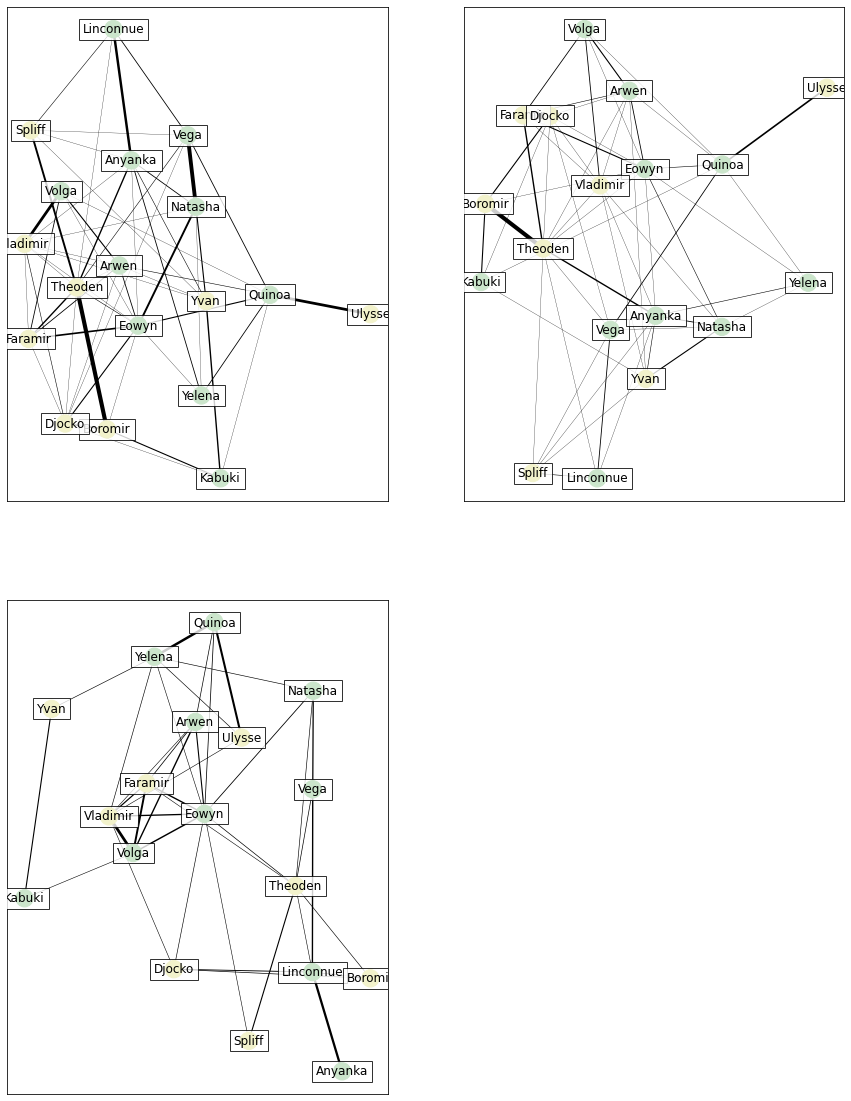

In [370]:
fig, ax = plt.subplots(figsize=(15,20))
plt.subplot(221)
g = nx.Graph(matrix_affiliative)
widths = g.edges()
weights = [(g[u][v]['weight'])*50 for u,v in widths]
pos=nx.spring_layout(g)
nx.draw_networkx_edges(g,pos, width=weights)
nx.draw_networkx_nodes(g, pos, node_color=color_genders)
label_options = {"fc": "white", "alpha": 0.8}
nx.draw_networkx_labels(g, pos, labels=names, bbox=label_options)
ax.margins(0.5, 0.5)
ax.set_title('Affiliative behavior')

plt.subplot(222)
g = nx.Graph(matrix_affiliative_directed)
widths = g.edges()
weights = [(g[u][v]['weight'])*50 for u,v in widths]
pos=nx.spring_layout(g)
nx.draw_networkx_edges(g,pos, width=weights)
nx.draw_networkx_nodes(g, pos, node_color=color_genders)
label_options = {"fc": "white", "alpha": 0.8}
nx.draw_networkx_labels(g, pos, labels=names, bbox=label_options)
ax.margins(0.5, 0.5)
ax.set_title('Affiliative behavior directed')

plt.subplot(223)
g = nx.Graph(matrix_proximity)
widths = g.edges()
weights = [(g[u][v]['weight'])*100 for u,v in widths]
pos=nx.spring_layout(g)
nx.draw_networkx_edges(g,pos, width=weights)
nx.draw_networkx_nodes(g, pos, node_color=color_genders)
label_options = {"fc": "white", "alpha": 0.8}
nx.draw_networkx_labels(g, pos, labels=names, bbox=label_options)
ax.margins(0.5, 0.5)
ax.set_title('Proximity behavior')

#plt.savefig('C:/Users/maell/Documents/ENS/Cours/Césure/Stage_Sliwa/Strasbourg/Code/affiliative_behavior.png')


In [83]:
matrix_proximity = np.zeros(shape=(len(individus), len(individus)))
total = 0
for fichier in fichiers :
    data=pd.read_csv(fichier, sep=';', encoding="latin-1")
    for rang in range(len(data)):
        focal = data.Subject[rang]
        if data.Behavior[rang] == '1. Contact passif' or data.Behavior[rang] =='2. Espace peripersonnel':
            for i in individus:
                if i in str(data.Modifiers[rang]):
                    matrix_proximity[individus.index(i)][individus.index(focal)]+=1
                    matrix_proximity[individus.index(focal)][individus.index(i)]+=1
                    total += 1
                    
        if data.Behavior[rang] == '3. peri<...<2m':
            for i in individus:
                if i in str(data.Modifiers[rang]):
                    matrix_proximity[individus.index(i)][individus.index(focal)]+=0.5
                    matrix_proximity[individus.index(focal)][individus.index(i)]+=0.5
                    total += 1 
                                    
matrix_proximity = matrix_proximity/total
mean = np.mean(matrix_proximity)
matrix_proximity = matrix_proximity/mean